In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set_palette('Set2')

![alt text](corn_graphic.png "Corn Stages")

In [2]:
data = pd.read_csv('G2F_Indigo_metadata.csv')

In [3]:
data.shape

(2280, 12)

In [4]:
data.head(10)

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
0,6198.0,sample6146,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,1.0,V4,CO
1,6198.0,sample6476,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,1.0,V4,CO
2,6199.0,sample6147,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,2.0,V4,CO
3,6199.0,sample6477,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,2.0,V4,CO
4,6200.0,sample6148,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,3.0,V5,CO
5,6200.0,sample6478,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,3.0,V5,CO
6,6201.0,sample6149,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,4.0,V4,CO
7,6201.0,sample6479,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,4.0,V4,CO
8,6202.0,sample6150,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,5.0,V4,CO
9,6202.0,sample6480,Zea mays,Leaf,6/14/2017,COH1,40.648434,-105.000275,1547.5,5.0,V4,CO


In [5]:
data.dtypes

sample_id          float64
sequence_label      object
crop                object
tissue              object
collection_date     object
location            object
gps_latitude       float64
gps_longitude      float64
elevation          float64
plant_id           float64
plant_stage         object
state               object
dtype: object

<h1 style="text-align: center;">Missing Values and Duplicates</h1>

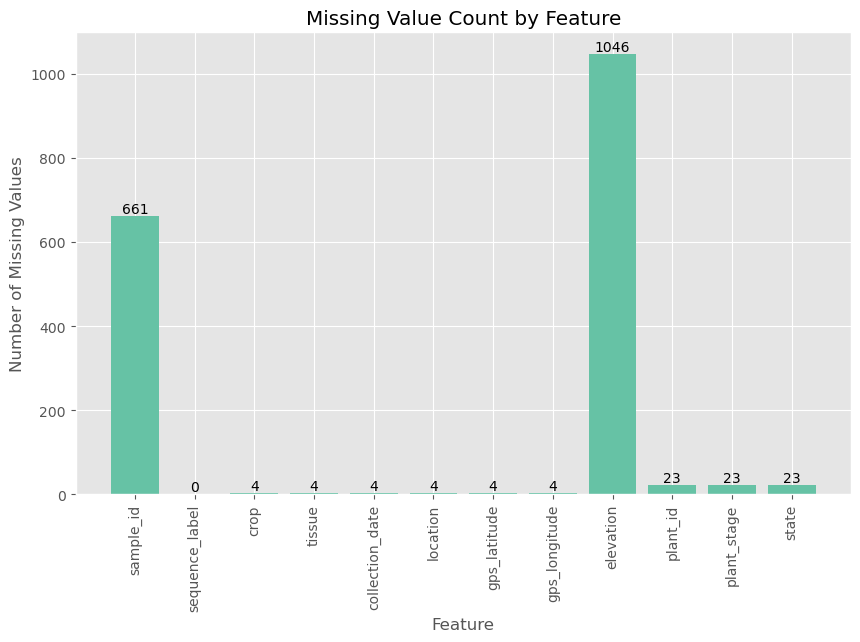

In [6]:
# Plot of missing values in each column, add value to bars

missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
plot = plt.bar(missing_values.index, missing_values.values)
plt.bar_label(plot, label_type = 'edge')
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')
plt.title('Missing Value Count by Feature')
plt.show()

In [7]:
# Convert sample_id and plant_id to Int64 to deal with missing values
data['sample_id'] = data['sample_id'].astype('Int64')
data['plant_id'] = data['plant_id'].astype('Int64')

In [8]:
# Zea mays the only species?
data['crop'].unique()

array(['Zea mays', nan], dtype=object)

In [9]:
# Duplicated rows? None

data[data.duplicated()]

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state


In [10]:
# Look at duplicates in sequence_label (This connects to FASTQ files), sort values

seq_label_dups = data[data.duplicated(subset=['sequence_label'], keep=False)]
seq_label_dups = seq_label_dups.sort_values(by='sequence_label')

seq_label_dups.head(20)

,sample_id,sequence_label,crop,tissue,collection_date,location,gps_latitude,gps_longitude,elevation,plant_id,plant_stage,state
1616,<NA>,sample12786,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,21,V11,GA
1266,11225,sample12786,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,21,V11,GA
1617,<NA>,sample12787,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,22,V10,GA
1267,11226,sample12787,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,22,V10,GA
1269,11227,sample12788,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,23,V10,GA
1618,<NA>,sample12788,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,23,V10,GA
1272,11228,sample12789,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,24,V11,GA
1619,<NA>,sample12789,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,24,V11,GA
1273,11229,sample12790,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,25,V10,GA
1620,<NA>,sample12790,Zea mays,Shoot,5/25/2018,Georgia,31.505697,-83.555129,NaN,25,V10,GA


In [11]:
print(f'Total duplicated sequence_label entries: {int(len(seq_label_dups) / 2)}')

Total duplicated sequence_label entries: 338


In [12]:
# Groupby sequence_label,  check if all True
grouped = seq_label_dups.groupby('sequence_label')['sample_id']

# check if sample_id had exactly one Nan and exactly one Int
pattern_check = grouped.apply(lambda x: x.isnull().sum() == 1 and x.dropna().nunique() == 1) # Boolean series

# Is Int entry index < NaN entry index?
index_check = grouped.apply(lambda x: list(x[~x.isnull()].index)[0] < list(x[x.isnull()].index)[0])

print(f'All same pattern? {pattern_check.all()}')

print(f'For all, Int index < NaN index? {index_check.all()}')

All same pattern? True
For all, Int index < NaN index? True


In [15]:
print(f'Entries Before Drop: {len(data)}')

# Drop duplicates in sequence_label, keep Int entry in sample_id

data = data.drop_duplicates(subset=['sequence_label'], keep='first')

print(f'Entries After Drop: {len(data)}')

Entries Before Drop: 2280
Entries After Drop: 1942
